In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv('train.csv', sep=',')
dataPredict = pd.read_csv('test.csv', sep=',')
pd.options.display.max_columns = None
pd.set_option('expand_frame_repr', False)
data.head()

,job_level,job_duration_in_current_job_level,person_level,job_duration_in_current_person_level,job_duration_in_current_branch,Employee_type,Employee_status,gender,age,marital_status_maried(Y/N),number_of_dependences,number_of_dependences (male),number_of_dependences (female),Education_level,GPA,year_graduated,job_duration_as_permanent_worker,job_duration_from_training,branch_rotation,job_rotation,assign_of_otherposition,annual leave,sick_leaves,Best Performance,Avg_achievement_%,Last_achievement_%,Achievement_above_100%_during3quartal,achievement_target_1,achievement_target_2,achievement_target_3
0,JG05,8.00,PG06,8.00,0.50,RM_type_A,Permanent,Female,1964,Y,3,1,2,level_4,2.32,1987,30.0,30,9,7,0,8,0,0,68.85,72.53,0.0,achiev_50%-100%,achiev_< 50%,reached
1,JG04,5.17,PG04,2.00,1.25,RM_type_A,Permanent,Male,1979,Y,3,2,1,level_4,3.25,2001,15.0,16,7,7,9,3,0,0,94.81,101.13,3.0,achiev_50%-100%,achiev_50%-100%,reached
2,JG04,1.83,PG03,1.83,1.50,RM_type_A,Permanent,Male,1980,Y,1,0,1,level_5,3.23,2007,15.0,15,9,9,0,6,0,0,72.82,71.30,0.0,achiev_100%-150%,achiev_< 50%,not_reached
3,JG04,7.92,PG04,4.00,0.17,RM_type_A,Permanent,Male,1984,Y,0,0,0,level_3,0.00,2006,8.0,8,5,5,0,3,0,0,86.89,90.09,2.0,achiev_50%-100%,achiev_50%-100%,not_reached
4,JG04,1.83,PG03,1.83,2.08,RM_type_A,Permanent,Male,1984,Y,1,0,1,NaN,NaN,NaN,7.0,7,4,6,11,2,1,1,95.17,100.72,2.0,achiev_< 50%,achiev_> 1.5,not_reached


In [2]:
fdata = data.drop(['Education_level',
                    'GPA',
                    'year_graduated',
                   
#                    'Avg_achievement_%',
#                    'Last_achievement_%',
#                    'Achievement_above_100%_during3quartal',
#                    'achievement_target_1',
#                    'achievement_target_2',
#                    'achievement_target_3'
                   ], 
                   axis=1)


fdata2 = dataPredict.drop(['Education_level',
                    'GPA',
                    'year_graduated',
                   
#                    'Avg_achievement_%',
#                    'Last_achievement_%',
#                    'Achievement_above_100%_during3quartal',
#                    'achievement_target_1',
#                    'achievement_target_2',
#                    'achievement_target_3'
                           ], 
                   axis=1)

In [3]:
f1data = fdata.dropna()
f1data_label = f1data['Best Performance']
f1data = f1data.drop('Best Performance', axis = 1)
data_combine = f1data.append(fdata2)
print(len(data_combine))
print(len(f1data))
print(data.isnull().sum())
f1data.head()

21277
15277
job_level                                   0
job_duration_in_current_job_level           0
person_level                                0
job_duration_in_current_person_level        0
job_duration_in_current_branch              0
Employee_type                              12
Employee_status                             0
gender                                      0
age                                         0
marital_status_maried(Y/N)                  0
number_of_dependences                       0
number_of_dependences (male)                0
number_of_dependences (female)              0
Education_level                          3608
GPA                                      3503
year_graduated                           3503
job_duration_as_permanent_worker         2055
job_duration_from_training                  0
branch_rotation                             0
job_rotation                                0
assign_of_otherposition                     0
annual leave          

,job_level,job_duration_in_current_job_level,person_level,job_duration_in_current_person_level,job_duration_in_current_branch,Employee_type,Employee_status,gender,age,marital_status_maried(Y/N),number_of_dependences,number_of_dependences (male),number_of_dependences (female),job_duration_as_permanent_worker,job_duration_from_training,branch_rotation,job_rotation,assign_of_otherposition,annual leave,sick_leaves,Avg_achievement_%,Last_achievement_%,Achievement_above_100%_during3quartal,achievement_target_1,achievement_target_2,achievement_target_3
0,JG05,8.00,PG06,8.00,0.50,RM_type_A,Permanent,Female,1964,Y,3,1,2,30.0,30,9,7,0,8,0,68.85,72.53,0.0,achiev_50%-100%,achiev_< 50%,reached
1,JG04,5.17,PG04,2.00,1.25,RM_type_A,Permanent,Male,1979,Y,3,2,1,15.0,16,7,7,9,3,0,94.81,101.13,3.0,achiev_50%-100%,achiev_50%-100%,reached
2,JG04,1.83,PG03,1.83,1.50,RM_type_A,Permanent,Male,1980,Y,1,0,1,15.0,15,9,9,0,6,0,72.82,71.30,0.0,achiev_100%-150%,achiev_< 50%,not_reached
3,JG04,7.92,PG04,4.00,0.17,RM_type_A,Permanent,Male,1984,Y,0,0,0,8.0,8,5,5,0,3,0,86.89,90.09,2.0,achiev_50%-100%,achiev_50%-100%,not_reached
4,JG04,1.83,PG03,1.83,2.08,RM_type_A,Permanent,Male,1984,Y,1,0,1,7.0,7,4,6,11,2,1,95.17,100.72,2.0,achiev_< 50%,achiev_> 1.5,not_reached


In [4]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
LE = LabelEncoder()

data_combine['job_level'] = LE.fit_transform(data_combine['job_level'])
data_combine['person_level'] = LE.fit_transform(data_combine['person_level'])
data_combine['Employee_type'] = LE.fit_transform(data_combine['Employee_type'])
data_combine['Employee_status'] = LE.fit_transform(data_combine['Employee_status'])
data_combine['gender'] = LE.fit_transform(data_combine['gender'])
#data_combine['age'] = LE.fit_transform(data_combine['age'])
data_combine['marital_status_maried(Y/N)'] = LE.fit_transform(data_combine['marital_status_maried(Y/N)'])
data_combine['achievement_target_1'] = LE.fit_transform(data_combine['achievement_target_1'])
data_combine['achievement_target_2'] = LE.fit_transform(data_combine['achievement_target_2'])
data_combine['achievement_target_3'] = LE.fit_transform(data_combine['achievement_target_3'])
#data_combine['Education_level'] = LE.fit_transform(data_combine['Education_level'])
data_combine

,job_level,job_duration_in_current_job_level,person_level,job_duration_in_current_person_level,job_duration_in_current_branch,Employee_type,Employee_status,gender,age,marital_status_maried(Y/N),number_of_dependences,number_of_dependences (male),number_of_dependences (female),job_duration_as_permanent_worker,job_duration_from_training,branch_rotation,job_rotation,assign_of_otherposition,annual leave,sick_leaves,Avg_achievement_%,Last_achievement_%,Achievement_above_100%_during3quartal,achievement_target_1,achievement_target_2,achievement_target_3
0,2,8.00,5,8.00,0.50,0,0,0,1964,1,3,1,2,30.0,30,9,7,0,8,0,68.850000,72.53,0.0,6,7,2
1,1,5.17,3,2.00,1.25,0,0,1,1979,1,3,2,1,15.0,16,7,7,9,3,0,94.810000,101.13,3.0,6,6,2
2,1,1.83,2,1.83,1.50,0,0,1,1980,1,1,0,1,15.0,15,9,9,0,6,0,72.820000,71.30,0.0,5,7,1
3,1,7.92,3,4.00,0.17,0,0,1,1984,1,0,0,0,8.0,8,5,5,0,3,0,86.890000,90.09,2.0,6,6,1
4,1,1.83,2,1.83,2.08,0,0,1,1984,1,1,0,1,7.0,7,4,6,11,2,1,95.170000,100.72,2.0,7,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,0,2.75,0,2.75,2.75,1,0,1,1987,0,0,0,0,3.0,3,1,1,0,1,0,49.396667,50.71,0.0,6,7,0
5996,1,1.17,2,1.17,0.50,1,0,1,1987,1,1,0,1,4.0,4,3,3,0,0,0,76.590000,77.70,0.0,6,7,2
5997,1,1.83,2,1.83,1.92,0,0,1,1986,1,2,1,1,7.0,7,5,3,0,3,0,97.906667,111.49,3.0,5,5,2
5998,1,1.92,2,1.92,1.25,0,0,1,1984,1,0,0,0,6.0,6,5,3,0,1,0,82.833333,81.64,0.0,5,6,0


In [5]:
len(data) - len(f1data)

6728

In [6]:
pred_real_data = data_combine[len(data_combine)-6000:]
data_for_train_test = data_combine[:len(data_combine)-6000]
data_for_train_test = data_for_train_test.assign(best_performance=f1data_label.values)
data_for_train_test

,job_level,job_duration_in_current_job_level,person_level,job_duration_in_current_person_level,job_duration_in_current_branch,Employee_type,Employee_status,gender,age,marital_status_maried(Y/N),number_of_dependences,number_of_dependences (male),number_of_dependences (female),job_duration_as_permanent_worker,job_duration_from_training,branch_rotation,job_rotation,assign_of_otherposition,annual leave,sick_leaves,Avg_achievement_%,Last_achievement_%,Achievement_above_100%_during3quartal,achievement_target_1,achievement_target_2,achievement_target_3,best_performance
0,2,8.00,5,8.00,0.50,0,0,0,1964,1,3,1,2,30.0,30,9,7,0,8,0,68.850000,72.53,0.0,6,7,2,0
1,1,5.17,3,2.00,1.25,0,0,1,1979,1,3,2,1,15.0,16,7,7,9,3,0,94.810000,101.13,3.0,6,6,2,0
2,1,1.83,2,1.83,1.50,0,0,1,1980,1,1,0,1,15.0,15,9,9,0,6,0,72.820000,71.30,0.0,5,7,1,0
3,1,7.92,3,4.00,0.17,0,0,1,1984,1,0,0,0,8.0,8,5,5,0,3,0,86.890000,90.09,2.0,6,6,1,0
4,1,1.83,2,1.83,2.08,0,0,1,1984,1,1,0,1,7.0,7,4,6,11,2,1,95.170000,100.72,2.0,7,8,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21999,1,1.92,2,1.92,2.17,0,0,1,1987,1,0,0,0,5.0,5,2,2,0,9,2,68.230000,76.66,0.0,1,2,2,0
22000,1,1.50,2,1.50,3.42,1,0,1,1986,1,1,0,1,5.0,5,2,2,0,2,0,71.776667,75.53,0.0,1,1,2,0
22002,1,1.50,2,1.50,0.00,0,0,1,1983,1,2,0,2,7.0,7,5,4,0,3,2,108.856667,111.65,3.0,1,1,2,0
22003,1,1.50,2,1.50,0.00,0,0,1,1988,1,1,0,1,6.0,6,5,4,0,13,0,76.366667,79.65,0.0,0,1,0,0


In [7]:
import h2o
from h2o.automl import H2OAutoML
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 . connected.


H2O_cluster_uptime:,59 mins 40 secs
H2O_cluster_timezone:,Asia/Bangkok
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.32.0.2
H2O_cluster_version_age:,1 month and 2 days
H2O_cluster_name:,H2O_from_python_Rizky_Saputra_022xku
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,1.213 Gb
H2O_cluster_total_cores:,4
H2O_cluster_allowed_cores:,4
H2O_cluster_status:,"locked, healthy"


In [8]:
df = h2o.H2OFrame(data_for_train_test)

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [9]:
df['best_performance'] = df['best_performance'].asfactor()
df['best_performance'].levels()

[['0', '1']]

In [10]:
y = 'best_performance'
x = list(df.columns)
x.remove(y)
# print(len(train), len(validate), len(test))

In [11]:
aml = H2OAutoML(max_models = 10, seed = 1)
aml.train(x = x, y = y, training_frame = df)


AutoML progress: |█
11:14:02.852: AutoML: XGBoost is not available; skipping it.

███████████████████████████████████████████████████████| 100%


In [12]:
print(aml.leader.auc())
lb = aml.leaderboard
lb

0.880891132199224


model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse
StackedEnsemble_AllModels_AutoML_20201220_111402,0.582272,0.414519,0.202756,0.442562,0.353569,0.125011
StackedEnsemble_BestOfFamily_AutoML_20201220_111402,0.581592,0.414875,0.201324,0.443304,0.353794,0.12517
GBM_grid__1_AutoML_20201220_111402_model_1,0.577497,0.414606,0.201473,0.443462,0.353556,0.125002
GBM_5_AutoML_20201220_111402,0.576434,0.416886,0.199071,0.444461,0.354405,0.125603
GBM_1_AutoML_20201220_111402,0.574594,0.416482,0.195173,0.450736,0.354566,0.125717
GBM_2_AutoML_20201220_111402,0.573442,0.416843,0.196612,0.450038,0.354568,0.125718
GBM_3_AutoML_20201220_111402,0.572375,0.418085,0.193882,0.464087,0.355132,0.126118
DRF_1_AutoML_20201220_111402,0.562785,0.425643,0.185767,0.478298,0.357804,0.128024
GBM_4_AutoML_20201220_111402,0.560981,0.422681,0.189436,0.466835,0.356603,0.127165
XRT_1_AutoML_20201220_111402,0.560798,0.424236,0.184531,0.472272,0.357156,0.12756


In [13]:
# Get model ids for all models in the AutoML Leaderboard
model_ids = list(aml.leaderboard['model_id'].as_data_frame().iloc[:,0])
# Get the "All Models" Stacked Ensemble model
se = h2o.get_model([mid for mid in model_ids if "StackedEnsemble_AllModels" in mid][0])
# Get the Stacked Ensemble metalearner model
metalearner = h2o.get_model(se.metalearner()['name'])

E:\Anaconda\envs\project1\lib\site-packages\h2o\estimators\stackedensemble.py:804: H2ODeprecationWarning: The usage of stacked_ensemble.metalearner()['name'] will be deprecated. Metalearner now returns the metalearner object. If you need to get the 'name' please use stacked_ensemble.metalearner().model_id
  H2ODeprecationWarning


In [14]:
metalearner.coef_norm()

{'Intercept': -1.773951946793869,
 'GBM_grid__1_AutoML_20201220_111402_model_1': 0.12005214222005627,
 'GBM_5_AutoML_20201220_111402': 0.11529428006722024,
 'GBM_1_AutoML_20201220_111402': 0.023640642438074063,
 'GBM_2_AutoML_20201220_111402': 0.025350997352670105,
 'GBM_3_AutoML_20201220_111402': 0.014841590674928268,
 'DRF_1_AutoML_20201220_111402': 0.025868143510676362,
 'GBM_4_AutoML_20201220_111402': 0.001560474619376883,
 'XRT_1_AutoML_20201220_111402': 9.926569037961624e-06,
 'GLM_1_AutoML_20201220_111402': 0.026223141544788546,
 'DeepLearning_1_AutoML_20201220_111402': 0.0}

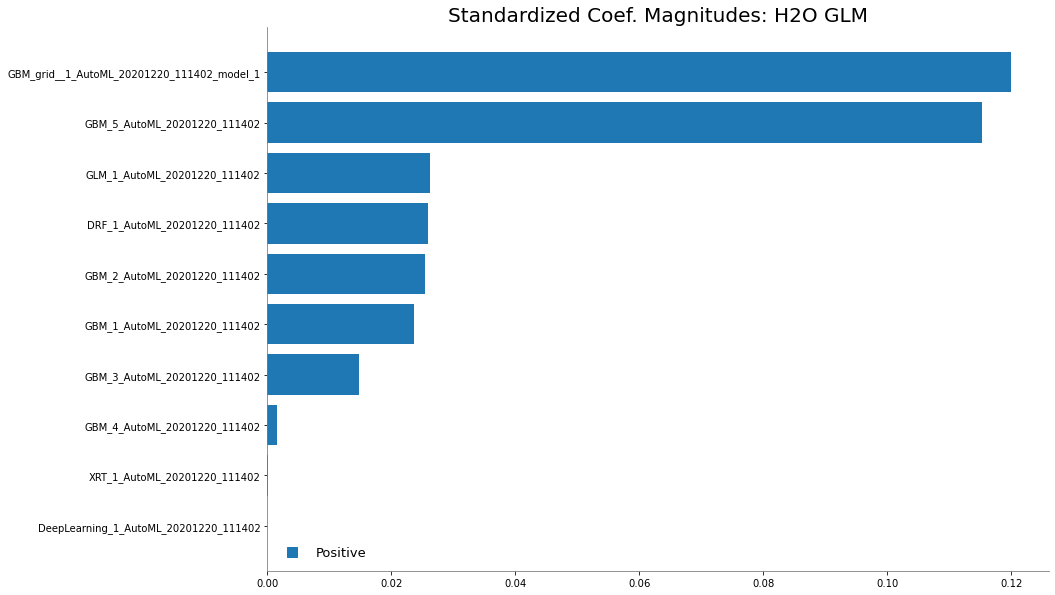

In [15]:
%matplotlib inline
metalearner.std_coef_plot()

In [16]:
real_p = h2o.H2OFrame(pred_real_data)
auto = aml.leader
print(auto.varimp(use_pandas=True))
#auto.varimp_plot()
res_pred = auto.predict(real_p)

Parse progress: |█████████████████████████████████████████████████████████| 100%
None
stackedensemble prediction progress: |████████████████████████████████████| 100%


In [17]:
lb = aml.leaderboard
#print(lb)
lb[:5,"model_id"]

model_id
StackedEnsemble_AllModels_AutoML_20201220_111402
StackedEnsemble_BestOfFamily_AutoML_20201220_111402
GBM_grid__1_AutoML_20201220_111402_model_1
GBM_5_AutoML_20201220_111402
GBM_1_AutoML_20201220_111402


                                 variable  relative_importance  scaled_importance  percentage
0          job_duration_in_current_branch           191.224976           1.000000    0.169052
1                      Last_achievement_%           124.010956           0.648508    0.109632
2                       Avg_achievement_%           117.258102           0.613194    0.103662
3                            annual leave            80.767578           0.422369    0.071402
4    job_duration_in_current_person_level            64.951042           0.339658    0.057420
5                                     age            56.599419           0.295983    0.050037
6       job_duration_in_current_job_level            54.544533           0.285237    0.048220
7                         branch_rotation            42.313908           0.221278    0.037408
8                            job_rotation            40.103512           0.209719    0.035453
9                    achievement_target_1            38.1815

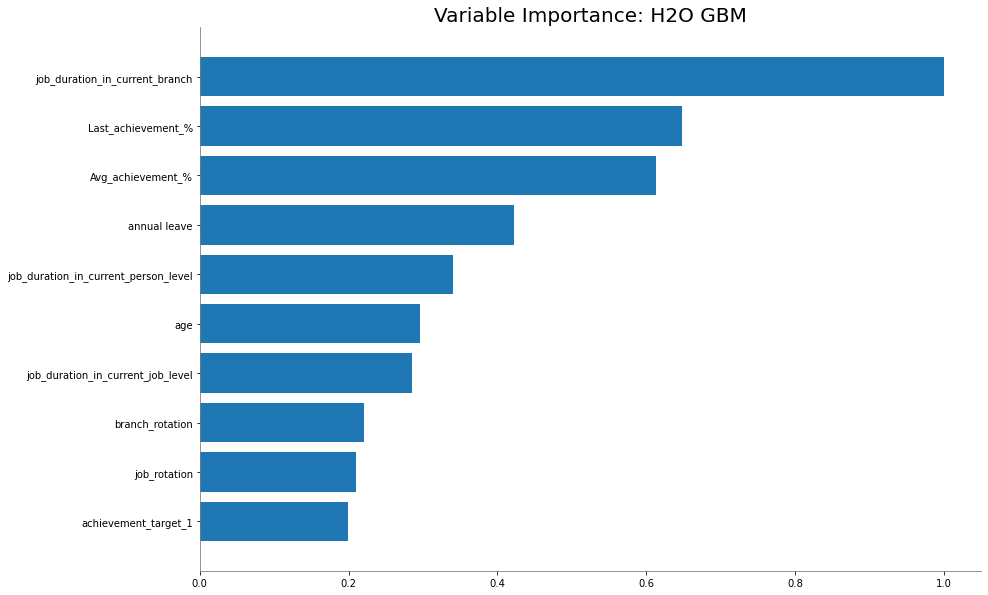

In [22]:
m = h2o.get_model(lb[3,"model_id"])
print(m.varimp(use_pandas=True))
print(m.auc())
m.varimp_plot()

In [19]:
df_res = res_pred.as_data_frame()
print(auto.auc())


0.880891132199224


In [20]:
df_res = pd.DataFrame(df_res['p1'])
df_res.columns = ['Best Performance']
df_res['index'] = df_res.index
df_res = df_res[['index', 'Best Performance']]
df_res.head()
#print(df_res.max())

,index,Best Performance
0,0,0.112193
1,1,0.116359
2,2,0.161874
3,3,0.143309
4,4,0.112245


In [21]:
df_res.to_csv('pred_result_with_h2o_autoML.csv', index=False)